In [5]:
!pip install tensorflow-gpu

    100% |████████████████████████████████| 345.2MB 74kB/s 




   1.   All the Layers in the 3 models have ReLU as the activation function
   2.   The models have dropout and batch normalization implemented in each layer. 



In [1]:
import tensorflow as tf
print(tf.__version__)

1.13.1


**Importing the MNSIT Dataset**

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


**This section of code plots the train & test loss against no. of epochs**

In [0]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, y, y_1, ax, ticks,title, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

**Model-1 input(784)-droput(ReLU (Batch_Norm((364))))-dropout(ReLU (Batch_Norm((72))))-output(10)**

In [0]:
#No. of neurons in the architecture i.e. each layer
n_input=784
n_hidden_1=364
n_hidden_2=72
n_output=10

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

#keep_prob will be used while testing the model
keep_prob=tf.placeholder(tf.float32)

#keep_prob_input will be used while training the model
keep_prob_input=tf.placeholder(tf.float32)

In [6]:
#Weights and bias initialization

#Since here the actication function we are using is ReLU we will be using the He-normal initialization

# h1 =>  σ=√(2/(fan_in+1) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in+1) = 0.074  => N(0,σ) = N(0,0.074)
# out =>  σ=√(2/(fan_in+1) = 0.165  => N(0,σ) = N(0,0.165)

weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1],stddev=0.062,mean=0)),       #784*364
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2],stddev=0.074,mean=0)),    #364*72
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_output],stddev=0.165,mean=0))       #72*10
    
}

#biases:- Being initialized from normal distribution and variance=1
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),             #364x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             #72x1
    'out': tf.Variable(tf.random_normal([n_output]))               #10x1
}

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Parameters
training_epochs = 30
learning_rate = 0.001
batch_size = 100
display_step = 1

The **def multilayer_perceptron() is the model which I have defined**.<br>
Here I'm adding batch normalization to only layer_2<br>
And dropouts to both the layers<br>

In [0]:
epsilon=1e-3
def multilayer_perceptron(x,weights,biases):
  print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())  
  
  #Hidden layer1
  layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1']) #z=w.Tx
  #passing z thorugh the Relu function
  
  batch_mean, batch_var=tf.nn.moments(layer_1,[0])
  
  scale=tf.Variable(tf.ones([n_hidden_1]))
  beta=tf.Variable(tf.zeros([n_hidden_1]))
  
  layer_1= tf.nn.batch_normalization(layer_1, batch_mean, batch_var, beta, scale, epsilon)
  
  
  layer_1=tf.nn.relu(layer_1)
  layer_1 = tf.nn.dropout(layer_1, keep_prob)
  print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape()) 
  
  #Hidden Layer-2
  
  layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
  
  #Adding batch normalization to layer_2
  batch_mean_1, batch_var_1 = tf.nn.moments(layer_2,[0])
    
  scale_1 = tf.Variable(tf.ones([n_hidden_2]))
  beta_1 = tf.Variable(tf.zeros([n_hidden_2]))
 
  layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
  
  layer_2=tf.nn.relu(layer_2) 
  layer_2 = tf.nn.dropout(layer_2, keep_prob)
  print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape())  
  
  #output layer
  output_layer=(tf.matmul(layer_2,weights['out']))+biases['out']
  output_layer=tf.nn.softmax(output_layer)
  
  print('output_layer:',output_layer.get_shape())
  
  return output_layer
  

x: (?, 784) W[h1]: (784, 364) b[h1]: (364,)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
layer_1: (?, 364) W[h2]: (364, 72) b[h2]: (72,)
layer_2: (?, 72) W[out]: (72, 10) b3: (10,)
output_layer: (?, 10)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use tf.cast instead.
Epoch: 0001 train cost=1.709600348 test cost=1.638301730
Epoch: 0002 train cost=1.568414876 test cost=1.520859503
Epoch: 0003 train cost=1.545664371 test cost=1.508133766
Epoch: 0004 train cost=1.534329044 test cost=1.501591983
Epoch: 0005 train cost=1.526377207 test cost=1.496782699
Epoch: 0006 train cost=1.520399981 test cost=1.494657627
Epoch: 0007 train cost=1.517069671 test cost=1.492606117
Epoch: 0008 train cost=1.514039433 test cost=1.491493285
Epoch: 0009 train cost=1.5105534

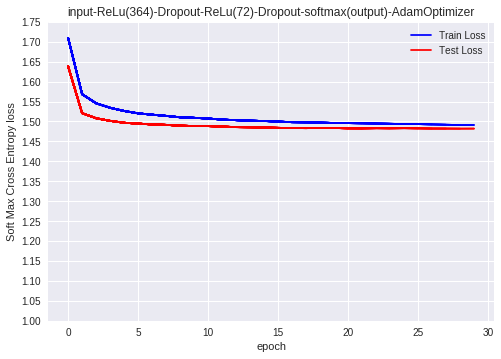

In [9]:
# Since we are using Relu activations in hiden layers we will be using weights that are initalized as weights_relu
ydrop = multilayer_perceptron(x, weights, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ydrop, labels = y_))
# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_drop_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_drop)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_drop_adam, cost_drop, weights], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = sess.run(cost_drop, feed_dict={x: mnist.test.images, y_: mnist.test.labels,  keep_prob: 1.0})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-ReLu(364)-Dropout-ReLu(72)-Dropout-softmax(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05),"input-ReLu(364)-Dropout-ReLu(72)-Dropout-softmax(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(ydrop,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0 }))

**Plotting weight distribution at the end of the training**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


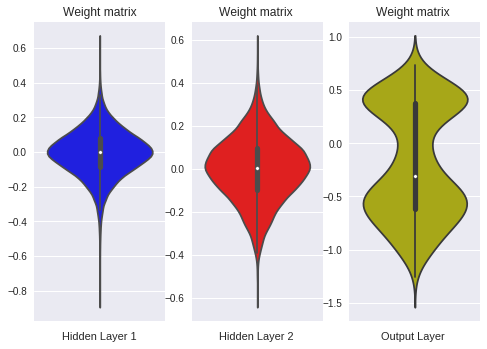

In [10]:
# Plot weight distriubtion at the end of training.

import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Model-2** <br>
**input-dropout-ReLU(batch_norm(256))-dropout-ReLU(batch_norm(144))-dropout-ReLU(batch_norm(128))-output**

In [0]:
#No. of neurons in the architecture i.e. each layer
n_input=784
n_hidden_1=512
n_hidden_2=256
n_hidden_3=128
n_output=10

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

#keep_prob will be used while testing the model
keep_prob=tf.placeholder(tf.float32)

#keep_prob_input will be used while training the model
keep_prob_input=tf.placeholder(tf.float32)

In [0]:
#Weights and bias initialization

#Since here the actication function we are using is ReLU we will be using the He-normal initialization

# h1 =>  σ=√(2/(fan_in+1) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in+1) = 0.088  => N(0,σ) = N(0,0.088)
# h3 =>  σ=√(2/(fan_in+1) = 0.088  => N(0,σ) = N(0,0.117)
# out =>  σ=√(2/(fan_in+1) = 0.165  => N(0,σ) = N(0,0.124)

weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1],stddev=0.062,mean=0)),       #784*256
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2],stddev=0.088,mean=0)),    #256*144
    'h3':tf.Variable(tf.random_normal([n_hidden_2,n_hidden_3],stddev=0.117,mean=0)),    #144*128
    'out':tf.Variable(tf.random_normal([n_hidden_3,n_output],stddev=0.124,mean=0))      #128*10
    
}

#biases:- Being initialized from normal distribution and variance=1
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),             #256x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             #144x1
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),             #128x1
    'out': tf.Variable(tf.random_normal([n_output]))               #10x1
}

In [0]:
# Parameters
training_epochs = 30
learning_rate = 0.001
batch_size = 100
display_step = 1

In [0]:
epsilon=1e-3
def multilayer_perceptron_model_2(x,weights,biases):
  print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())  
  
  #Hidden layer1
  layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1']) #z=w.Tx
  #passing z thorugh the Relu function
  
  batch_mean, batch_var=tf.nn.moments(layer_1,[0])
  
  scale=tf.Variable(tf.ones([n_hidden_1]))
  beta=tf.Variable(tf.zeros([n_hidden_1]))
  
  layer_1= tf.nn.batch_normalization(layer_1, batch_mean, batch_var, beta, scale, epsilon)
  
  
  layer_1=tf.nn.relu(layer_1)
  layer_1 = tf.nn.dropout(layer_1, keep_prob)
  print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape()) 
  
  #Hidden Layer-2
  
  layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
  
  #Adding batch normalization to layer_2
  batch_mean_1, batch_var_1 = tf.nn.moments(layer_2,[0])
    
  scale_1 = tf.Variable(tf.ones([n_hidden_2]))
  beta_1 = tf.Variable(tf.zeros([n_hidden_2]))
 
  layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
  
  layer_2=tf.nn.relu(layer_2) 
  layer_2 = tf.nn.dropout(layer_2, keep_prob)
  print( 'layer_2:', layer_2.get_shape(), 'W[h3]:', weights['h3'].get_shape(), 'b3:', biases['b3'].get_shape())  
  
  #Hidden Layer-3
  layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
  
  #Adding batch normalization to layer_2
  batch_mean_2, batch_var_2 = tf.nn.moments(layer_3,[0])
    
  scale_2 = tf.Variable(tf.ones([n_hidden_3]))
  beta_2 = tf.Variable(tf.zeros([n_hidden_3]))
 
  layer_3 = tf.nn.batch_normalization(layer_3, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon)
  
  layer_3 = tf.nn.relu(layer_3) 
  layer_3 = tf.nn.dropout(layer_3, keep_prob)
  print( 'layer_3:', layer_3.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape()) 
  
  
  #output layer
  output_layer=(tf.matmul(layer_3,weights['out']))+biases['out']
  output_layer=tf.nn.softmax(output_layer)
  
  print('output_layer:',output_layer.get_shape())
  
  return output_layer
  

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 256) b[h2]: (256,)
layer_2: (?, 256) W[h3]: (256, 128) b3: (128,)
layer_3: (?, 128) W[out]: (128, 10) b3: (10,)
output_layer: (?, 10)
Epoch: 0001 train cost=1.749003488 test cost=1.675700903
Epoch: 0002 train cost=1.564588924 test cost=1.519060127
Epoch: 0003 train cost=1.541098665 test cost=1.506237069
Epoch: 0004 train cost=1.529290479 test cost=1.499959950
Epoch: 0005 train cost=1.522740416 test cost=1.496630214
Epoch: 0006 train cost=1.517573327 test cost=1.493311763
Epoch: 0007 train cost=1.513271660 test cost=1.492221170
Epoch: 0008 train cost=1.508834893 test cost=1.490322819
Epoch: 0009 train cost=1.508250404 test cost=1.488644920
Epoch: 0010 train cost=1.504575922 test cost=1.487703178
Epoch: 0011 train cost=1.504009166 test cost=1.487216225
Epoch: 0012 train cost=1.500845253 test cost=1.487240739
Epoch: 0013 train cost=1.500491735 test cost=1.485886017
Epoch: 0014 train cost=1.498868707 test cost=1.484

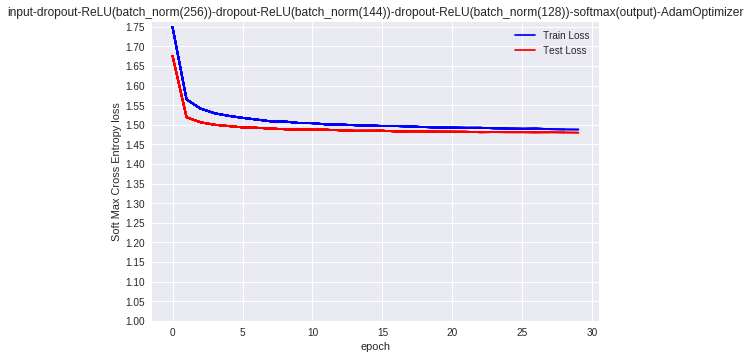

In [16]:
 # Since we are using Relu activations in hiden layers we will be using weights that are initalized as weights_relu
ydrop = multilayer_perceptron_model_2(x, weights, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ydrop, labels = y_))
# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_drop_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_drop)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_drop_adam, cost_drop, weights], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = sess.run(cost_drop, feed_dict={x: mnist.test.images, y_: mnist.test.labels,  keep_prob: 1.0})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-dropout-ReLU(batch_norm(256))-dropout-ReLU(batch_norm(144))-dropout-ReLU(batch_norm(128))-softmax(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05),"input-dropout-ReLU(batch_norm(256))-dropout-ReLU(batch_norm(144))-dropout-ReLU(batch_norm(128))-softmax(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(ydrop,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0 }))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


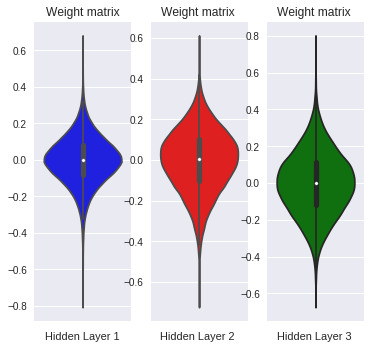

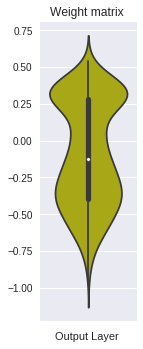

In [17]:
# Plot weight distriubtion at the end of training.

import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
h3_w=  w['h3'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 4, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Model-3  5 Hidden Layers**<br>
**input-dropout-ReLU(batch_norm(512))-dropout-ReLU(batch_norm(364))-dropout-ReLU(batch_norm(256))-dropout-ReLU(batch_norm(128))-dropout-ReLU(batch_norm(72))-output**


In [0]:
#No. of neurons in the architecture i.e. each layer
n_input=784
n_hidden_1=512
n_hidden_2=364
n_hidden_3=256
n_hidden_4=128
n_hidden_5=72
n_output=10

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

#keep_prob will be used while testing the model
keep_prob=tf.placeholder(tf.float32)

#keep_prob_input will be used while training the model
keep_prob_input=tf.placeholder(tf.float32)

In [0]:
#Weights and bias initialization

#Since here the actication function we are using is ReLU we will be using the He-normal initialization

# h1 =>  σ=√(2/(fan_in+1) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in+1) = 0.088  => N(0,σ) = N(0,0.088)
# h3 =>  σ=√(2/(fan_in+1) = 0.088  => N(0,σ) = N(0,0.117)
# out =>  σ=√(2/(fan_in+1) = 0.165  => N(0,σ) = N(0,0.124)

weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1],stddev=0.062,mean=0)),       #784x512
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2],stddev=0.0624,mean=0)),   #512x364
    'h3':tf.Variable(tf.random_normal([n_hidden_2,n_hidden_3],stddev=0.074,mean=0)),    #364x256
    'h4':tf.Variable(tf.random_normal([n_hidden_3,n_hidden_4],stddev=0.088,mean=0)),    #256x128
    'h5':tf.Variable(tf.random_normal([n_hidden_4,n_hidden_5],stddev=0.124,mean=0)),    #128x72
    'out':tf.Variable(tf.random_normal([n_hidden_5,n_output],stddev=0.165,mean=0))      #72*10
    
}

#biases:- Being initialized from normal distribution and variance=1
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),             #512x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             #364x1
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),             #256x1
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),             #128x1
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),             #72x1
    'out': tf.Variable(tf.random_normal([n_output]))               #10x1
}

In [0]:
# Parameters
training_epochs = 30
learning_rate = 0.001
batch_size = 100
display_step = 1

In [0]:
epsilon=1e-3
def multilayer_perceptron_model_3(x,weights,biases):
  print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())  
  
  #Hidden layer1
  layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1']) #z=w.Tx
  #passing z thorugh the Relu function
  
  batch_mean, batch_var=tf.nn.moments(layer_1,[0])
  
  scale=tf.Variable(tf.ones([n_hidden_1]))
  beta=tf.Variable(tf.zeros([n_hidden_1]))
  
  layer_1= tf.nn.batch_normalization(layer_1, batch_mean, batch_var, beta, scale, epsilon)
  
  
  layer_1=tf.nn.relu(layer_1)
  layer_1 = tf.nn.dropout(layer_1, keep_prob)
  print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape()) 
  
  #Hidden Layer-2
  
  layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
  
  #Adding batch normalization to layer_2
  batch_mean_1, batch_var_1 = tf.nn.moments(layer_2,[0])
    
  scale_1 = tf.Variable(tf.ones([n_hidden_2]))
  beta_1 = tf.Variable(tf.zeros([n_hidden_2]))
 
  layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
  
  layer_2=tf.nn.relu(layer_2) 
  layer_2 = tf.nn.dropout(layer_2, keep_prob)
  print( 'layer_2:', layer_2.get_shape(), 'W[h3]:', weights['h3'].get_shape(), 'b3:', biases['b3'].get_shape())  
  
  #Hidden Layer-3
  layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
  
  #Adding batch normalization to layer_3
  batch_mean_2, batch_var_2 = tf.nn.moments(layer_3,[0])
    
  scale_2 = tf.Variable(tf.ones([n_hidden_3]))
  beta_2 = tf.Variable(tf.zeros([n_hidden_3]))
 
  layer_3 = tf.nn.batch_normalization(layer_3, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon)
  
  layer_3 = tf.nn.relu(layer_3) 
  layer_3 = tf.nn.dropout(layer_3, keep_prob)
  print( 'layer_3:', layer_3.get_shape(), 'W[h4]:', weights['h4'].get_shape(), 'b4:', biases['b4'].get_shape()) 
  
  #Hidden Layer 4
  layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
  
  #Adding batch normalization to layer_4
  batch_mean_3, batch_var_3 = tf.nn.moments(layer_4,[0])
    
  scale_3 = tf.Variable(tf.ones([n_hidden_4]))
  beta_3 = tf.Variable(tf.zeros([n_hidden_4]))
 
  layer_4 = tf.nn.batch_normalization(layer_4, batch_mean_3, batch_var_3, beta_3, scale_3, epsilon)
  
  layer_4 = tf.nn.relu(layer_4) 
  layer_4 = tf.nn.dropout(layer_4, keep_prob)
  print( 'layer_4:', layer_4.get_shape(), 'W[h5]:', weights['h5'].get_shape(), 'b5:', biases['b5'].get_shape()) 
  
   #Hidden Layer 5
  layer_5=tf.add(tf.matmul(layer_4,weights['h5']),biases['b5'])
  
  #Adding batch normalization to layer_5
  batch_mean_4, batch_var_4 = tf.nn.moments(layer_5,[0])
    
  scale_4 = tf.Variable(tf.ones([n_hidden_5]))
  beta_4 = tf.Variable(tf.zeros([n_hidden_5]))
 
  layer_5 = tf.nn.batch_normalization(layer_5, batch_mean_4, batch_var_4, beta_4, scale_4, epsilon)
  
  layer_5 = tf.nn.relu(layer_5) 
  layer_5 = tf.nn.dropout(layer_5, keep_prob)
  print( 'layer_5:', layer_5.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b[out]:', biases['out'].get_shape()) 
  
  
  #output layer
  output_layer=(tf.matmul(layer_5,weights['out']))+biases['out']
  output_layer=tf.nn.softmax(output_layer)
  
  print('output_layer:',output_layer.get_shape())
  
  return output_layer
  

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 364) b[h2]: (364,)
layer_2: (?, 364) W[h3]: (364, 256) b3: (256,)
layer_3: (?, 256) W[h4]: (256, 128) b4: (128,)
layer_4: (?, 128) W[h5]: (128, 72) b5: (72,)
layer_5: (?, 72) W[out]: (72, 10) b[out]: (10,)
output_layer: (?, 10)
Epoch: 0001 train cost=1.887148278 test cost=1.774924940
Epoch: 0002 train cost=1.651187410 test cost=1.597717805
Epoch: 0003 train cost=1.602306449 test cost=1.552935745
Epoch: 0004 train cost=1.553052586 test cost=1.508484104
Epoch: 0005 train cost=1.540105425 test cost=1.503237091
Epoch: 0006 train cost=1.534654454 test cost=1.500382953
Epoch: 0007 train cost=1.529116870 test cost=1.497261689
Epoch: 0008 train cost=1.525214516 test cost=1.494964307
Epoch: 0009 train cost=1.521990519 test cost=1.494063812
Epoch: 0010 train cost=1.518701105 test cost=1.491946455
Epoch: 0011 train cost=1.517443964 test cost=1.491785371
Epoch: 0012 train cost=1.516128670 test cost=1.492041308
Epoch: 0013 t

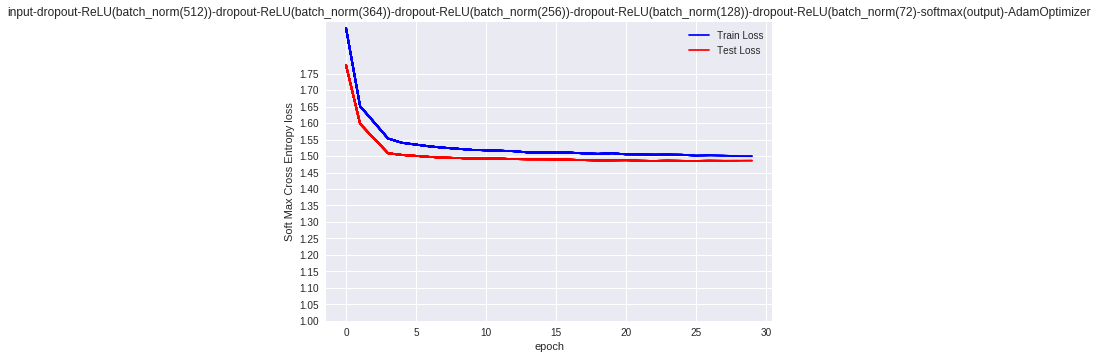

In [23]:
 # Since we are using Relu activations in hiden layers we will be using weights that are initalized as weights_relu
ydrop = multilayer_perceptron_model_3(x, weights, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ydrop, labels = y_))
# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_drop_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_drop)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_drop_adam, cost_drop, weights], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = sess.run(cost_drop, feed_dict={x: mnist.test.images, y_: mnist.test.labels,  keep_prob: 1.0})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-dropout-ReLU(batch_norm(512))-dropout-ReLU(batch_norm(364))-dropout-ReLU(batch_norm(256))-dropout-ReLU(batch_norm(128))-dropout-ReLU(batch_norm(72)-softmax(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05),"input-dropout-ReLU(batch_norm(512))-dropout-ReLU(batch_norm(364))-dropout-ReLU(batch_norm(256))-dropout-ReLU(batch_norm(128))-dropout-ReLU(batch_norm(72)-softmax(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(ydrop,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0 }))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


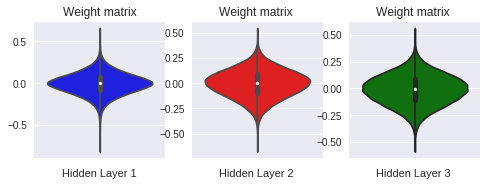

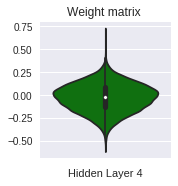

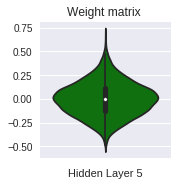

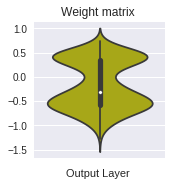

In [24]:
# Plot weight distriubtion at the end of training.

import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
h3_w=  w['h3'].flatten().reshape(-1,1)
h4_w=  w['h4'].flatten().reshape(-1,1)
h5_w=  w['h5'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(2, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(2, 3, 4)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4')
plt.show()

plt.subplot(2, 3, 5)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Hidden Layer 5')
plt.show()

plt.subplot(2,3,6)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()